# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

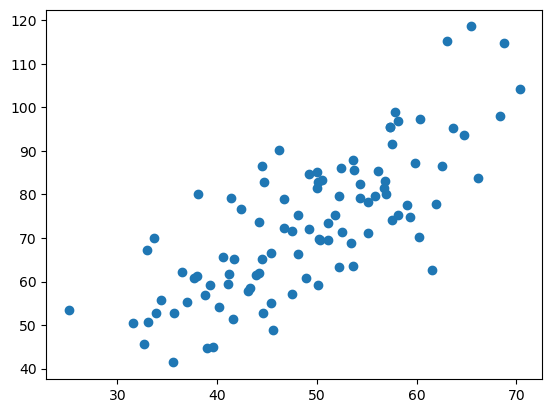

In [49]:
# We will use some dummy data
data = pd.read_csv('/users/a/Eurecom/MALIS/lab2/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [64]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        #2) Estimate the gradient
        gradient = -2 * inv_N * np.dot(X.T, y - y_hat)
        gradient_norm = np.linalg.norm(gradient)
        
        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights = weights - alpha * gradient 
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights
    

Now, test your implementation:

In [65]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.77657980508
Epoch  1  weights:  [[0.0146299 ]
 [0.74243353]] gradient_norm:  3703.361244079926
Epoch  2  weights:  [[0.02196252]
 [1.11269705]] gradient_norm:  1846.929402844237
Epoch  3  weights:  [[0.02565587]
 [1.29735306]] gradient_norm:  921.0953494141263
Epoch  4  weights:  [[0.02753425]
 [1.38944344]] gradient_norm:  459.36636312599336
Epoch  5  weights:  [[0.02850748]
 [1.43536977]] gradient_norm:  229.09469222476093
Epoch  6  weights:  [[0.02902929]
 [1.45827329]] gradient_norm:  114.25516148926222
Epoch  7  weights:  [[0.02932597]
 [1.46969496]] gradient_norm:  56.984479905883845
Epoch  8  weights:  [[0.02951038]
 [1.47539042]] gradient_norm:  28.426118721057215
Epoch  9  weights:  [[0.02963879]
 [1.47823013]] gradient_norm:  14.19059349285071
Epoch  10  weights:  [[0.02973928]
 [1.47964563]] gradient_norm:  7.10510126450725
Epoch  11  weights:  [[0.02982583]
 [1.48035084]] gradient_norm:  3.5990524904816272
Epoch  12  wei

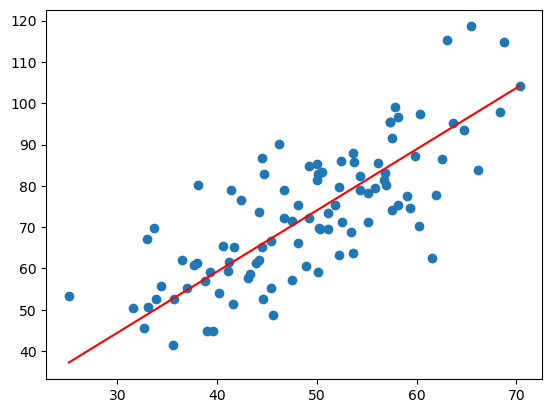

In [66]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

#Your answer
Step 3: Checking the stopping criterion
python
if np.abs(gradient_norm - prev_gradient) <= epsilon:
   break

In this step, the code is checking if the change in the gradient norm from the previous iteration to the current iteration is less than or equal to a specified threshold (`epsilon`). The gradient norm is the magnitude of the gradient vector, and it is calculated using the `np.linalg.norm` function. If the change in the gradient norm is less than or equal to `epsilon`, it means that the algorithm is converging to the minimum of the cost function, and the iterations are stopped to prevent overfitting.

Step 5: Updating the weights
python
weights = weights - alpha * gradient

In this step, the weights are updated by subtracting the product of the gradient and the learning rate (`alpha`) from the current weights. This is done because you want to move in the direction opposite to the gradient to minimize the cost function. The learning rate (`alpha`) determines the step size during each iteration while moving toward a minimum of a loss function. A smaller learning rate requires more iterations to converge but generally results in a more accurate model, while a larger learning rate requires fewer iterations to converge but may overshoot the minimum.

### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

In [82]:
# Your code and answer here
alpha = 0.0001
epochs = 1000
#epsilon = 0.00001

weights = gradient_descent(alpha, epochs, epsilon, X, y)

# Try changing the learning rate (alpha) and the number of epochs
alpha = 0.00001
epochs = 500

weights = gradient_descent(alpha, epochs, epsilon, X, y)

#Try changing the stopping criterion (epsilon)
epsilon = 0.01

weights = gradient_descent(alpha, epochs, epsilon, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.77657980508
Epoch  1  weights:  [[0.0146299 ]
 [0.74243353]] gradient_norm:  3703.361244079926
Epoch  2  weights:  [[0.02196252]
 [1.11269705]] gradient_norm:  1846.929402844237
Epoch  3  weights:  [[0.02565587]
 [1.29735306]] gradient_norm:  921.0953494141263
Epoch  4  weights:  [[0.02753425]
 [1.38944344]] gradient_norm:  459.36636312599336
Epoch  5  weights:  [[0.02850748]
 [1.43536977]] gradient_norm:  229.09469222476093
Epoch  6  weights:  [[0.02902929]
 [1.45827329]] gradient_norm:  114.25516148926222
Epoch  7  weights:  [[0.02932597]
 [1.46969496]] gradient_norm:  56.984479905883845
Epoch  8  weights:  [[0.02951038]
 [1.47539042]] gradient_norm:  28.426118721057215
Epoch  9  weights:  [[0.02963879]
 [1.47823013]] gradient_norm:  14.19059349285071
Epoch  10  weights:  [[0.02973928]
 [1.47964563]] gradient_norm:  7.10510126450725
Epoch  11  weights:  [[0.02982583]
 [1.48035084]] gradient_norm:  3.5990524904816272
Epoch  12  wei

### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [28]:

# Your code here

X_b = np.c_[np.ones((len(X), 1)), X]
t = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
closed_form_weights = t.flatten()

print("Gradient Descent Weights: ", weights)
print("Closed Form Solution Weights: ", closed_form_weights)

Gradient Descent Weights:  [[-2.72454235e+87]
 [-1.38955106e+89]]
Closed Form Solution Weights:  [4.00742783 2.85674284]


### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

In [29]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    costs = []

    for i in range(iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = np.sum(np.square(X.dot(theta) - y)) / (2 * m)
        costs.append(cost)

    return theta, costs

# Test the function
np.random.seed(42)
m = 100
n = 1
X = np.random.randn(m, n)
y = 4 + 3 * X + np.random.randn(m, 1)

t, costs = gradient_descent(X, y)

print('Theta found by gradient descent: ', theta)
print('Costs per iteration: ', costs)

Theta found by gradient descent:  [[2.3537157]]
Costs per iteration:  [9.960687547323694, 9.908381404897677, 9.857791870428576, 9.80886260745683, 9.761539128399702, 9.715768733873967, 9.67150045400991, 9.628684991691351, 9.587274667658399, 9.54722336741188, 9.508486489860271, 9.471020897651973, 9.434784869137582, 9.399738051908715, 9.365841417861574, 9.333057219735327, 9.301348949076765, 9.270681295584527, 9.241020107787575, 9.212332355014173, 9.184586090608915, 9.15775041635701, 9.131795448076018, 9.106692282336871, 9.082412964277044, 9.058930456470025, 9.036218608816489, 9.01425212942354, 8.993006556439719, 8.972458230814269, 8.95258426995047, 8.933362542223586, 8.914771642335099, 8.89679086747581, 8.879400194271193, 8.862580256483385, 8.846312323444968, 8.830578279200505, 8.81536060233264, 8.80064234645026, 8.786407121317, 8.772639074599102, 8.759322874212266, 8.746443691247853, 8.733987183459433, 8.72193947929126, 8.710287162430934, 8.699017256868999, 8.688117212448873, 8.677574890

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.